# 모델을 훈련합니다.


## 데이터 준비

In [40]:
import pandas as pd

filepath = './dataset/HeightVsWeight.csv'
df = pd.read_csv(filepath)
print(df)


    Age  Height
0    10     138
1    11     138
2    12     138
3    13     139
4    14     139
..  ...     ...
66   76     204
67   77     205
68   78     206
69   79     207
70   80     208

[71 rows x 2 columns]


In [41]:
import numpy as np

age_array = np.array(df['Age'])
height_array = np.array(df['Height'])

In [42]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    age_array,height_array, random_state=71)

In [43]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

## 데이터를 시각화하기

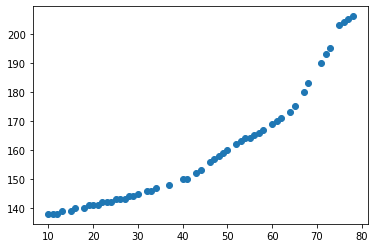

In [44]:
import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)
plt.show()

매우 선형적인 산점도를 보여주고 있다. 또한 이 직선이 2차함수 그래프랑
닳았으므로 다항회귀분석을 통하여 값을 예측해보도록 하겠습니다.

## 다항회귀 모델을 훈련합니다.

In [45]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50 **2, 50]]))

[159.05659733]


In [47]:
print(lr.coef_, lr.intercept_)

[ 0.01686207 -0.55690964] 144.74691506074612


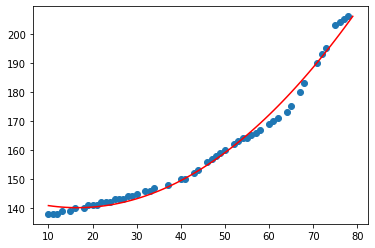

In [51]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(10, 80)

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 0.01686207*point**2 + (-0.55690964*point) + 144.74691506074612, 'r')

# 50cm 데이터
plt.show()

In [52]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly,test_target))

0.988857853689118
0.9930364574035696


훈련세트, 테스트세트 모두 훌륭한 정확도를 보여주었습니다.